# Comportement chaotique et sensibilité aux conditions initiales d'un pendule double

D'après un code de Mohammad Asif Zaman : https://github.com/zaman13/Double-Pendulum-Motion-Animation

In [1]:
%matplotlib inline
from scipy.integrate import odeint 
import numpy as np
from matplotlib import animation
import IPython.display as IPdisplay
from matplotlib import pyplot as plt

In [2]:
m1 = 2                 # mass of pendulum 1 (in kg)
m2 = 1                 # mass of pendulum 2 (in kg)
L1 = 1.4               # length of pendulum 1 (in meter)
L2 = 1                 # length of pendulum 2 (in meter)
g = 9.8                # gravitational acceleration constant (m/s^2)

u0 = [-np.pi/2.2, 0, np.pi/1.8, 0]    # initial conditions 1
u0b = [-np.pi/2.1, 0, np.pi/1.8, 0]    # initial conditions 2

# u[0] = angle of the first pendulum
# u[1] = angular velocity of the first pendulum
# u[2] = angle of the second pendulum
# u[3] = angular velocity of the second pendulum

tfinal = 25.0       # Final time. Simulation time = 0 to tfinal.
Nt = 751
t = np.linspace(0, tfinal, Nt)

In [3]:
def double_pendulum(u,t,m1,m2,L1,L2,g):
    # du = derivatives
    # u = variables
    # p = parameters
    # t = time variable
    
    du = np.zeros(4)
  
    c = np.cos(u[0]-u[2])  # intermediate variables
    s = np.sin(u[0]-u[2])  # intermediate variables

    du[0] = u[1]   # d(theta 1)
    du[1] = ( m2*g*np.sin(u[2])*c - m2*s*(L1*c*u[1]**2 + L2*u[3]**2) - (m1+m2)*g*np.sin(u[0]) ) /( L1 *(m1+m2*s**2) )
    du[2] = u[3]   # d(theta 2)   
    du[3] = ((m1+m2)*(L1*u[1]**2*s - g*np.sin(u[2]) + g*np.sin(u[0])*c) + m2*L2*u[3]**2*s*c) / (L2 * (m1 + m2*s**2))
    
    return du

In [4]:
sol = odeint(double_pendulum, u0, t, args=(m1,m2,L1,L2,g))
solb = odeint(double_pendulum, u0b, t, args=(m1,m2,L1,L2,g))

u0 = sol[:,0]     # theta_1 
u1 = sol[:,1]     # omega 1
u2 = sol[:,2]     # theta_2 
u3 = sol[:,3]     # omega_2

u0b = solb[:,0]     # theta_1 
u1b = solb[:,1]     # omega 1
u2b = solb[:,2]     # theta_2 
u3b = solb[:,3]     # omega_2 

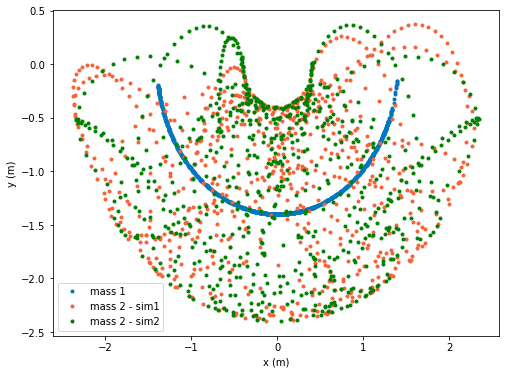

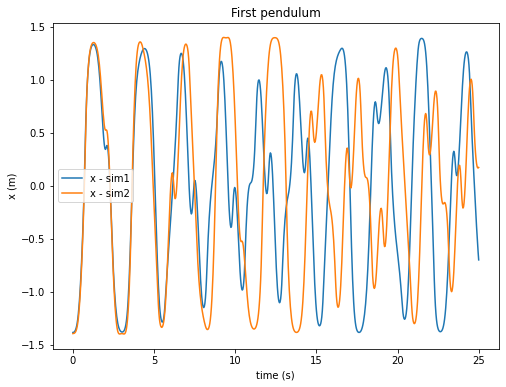

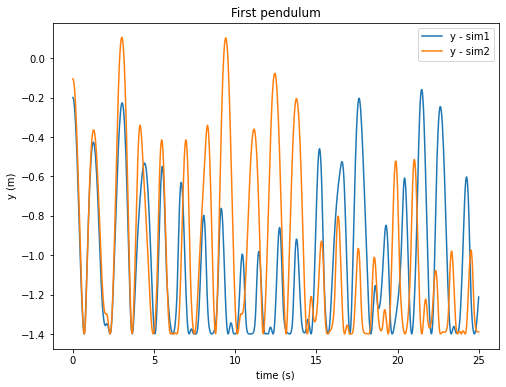

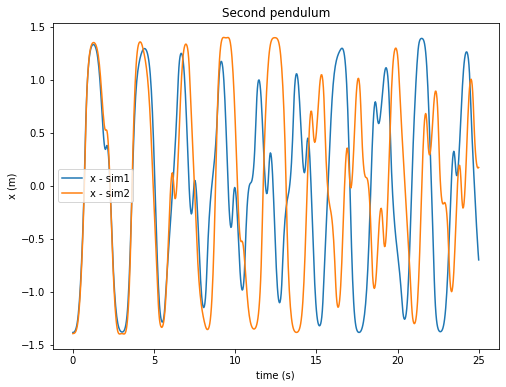

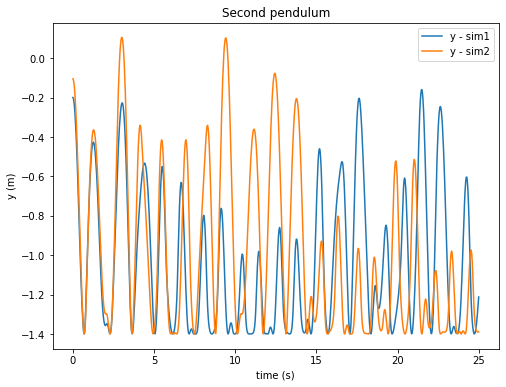

In [19]:
# Mapping from polar to Cartesian
x1 = L1*np.sin(u0);          # First Pendulum
y1 = -L1*np.cos(u0);
x2 = x1 + L2*np.sin(u2);     # Second Pendulum
y2 = y1 - L2*np.cos(u2);

# Mapping from polar to Cartesian
x1b = L1*np.sin(u0b);          # First Pendulum
y1b = -L1*np.cos(u0b);
x2b = x1b + L2*np.sin(u2b);     # Second Pendulum
y2b = y1b - L2*np.cos(u2b);

# X VS Y
fig = plt.figure(figsize=(8,6))
plt.plot(x1,y1,'.',color = '#0077BE',label = 'mass 1')
plt.plot(x2,y2,'.',color = '#f66338',label = 'mass 2 - sim1' )
plt.plot(x2b,y2b,'.',color = 'green',label = 'mass 2 - sim2' )
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()
fig.savefig('double_pendulum_phase.png',bbox_inches='tight')

# First pendulum
fig = plt.figure(figsize=(8,6))
plt.title('First pendulum')
plt.plot(t,x1,label = 'x - sim1')
plt.plot(t,x1b,label = 'x - sim2')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('x (m)')
plt.show()
fig.savefig('double_pendulum_x1.png',bbox_inches='tight')

# First pendulum
fig = plt.figure(figsize=(8,6))
plt.title('First pendulum')
plt.plot(t,y1,label = 'y - sim1')
plt.plot(t,y1b,label = 'y - sim2')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.show()
fig.savefig('double_pendulum_y1.png',bbox_inches='tight')

# Second pendulum
fig = plt.figure(figsize=(8,6))
plt.title('Second pendulum')
plt.plot(t,x1,label = 'x - sim1')
plt.plot(t,x1b,label = 'x - sim2')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('x (m)')
plt.show()
fig.savefig('double_pendulum_x2.png',bbox_inches='tight')

# Second pendulum
fig = plt.figure(figsize=(8,6))
plt.title('Second pendulum')
plt.plot(t,y1,label = 'y - sim1')
plt.plot(t,y1b,label = 'y - sim2')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.show()
fig.savefig('double_pendulum_y2.png',bbox_inches='tight')

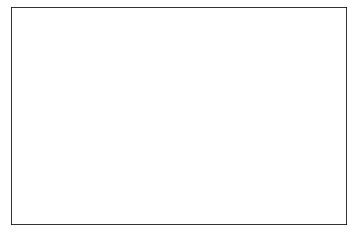

In [6]:
fig = plt.figure()
ax = plt.axes(xlim=(-L1-L2-0.5, L1+L2+0.5), ylim=(-2.5, 1.5))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
line1, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Earth
line2, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Jupiter
line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line5, = ax.plot([], [], 'o', color='k', markersize = 10)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)


ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

# initialization function: plot the background of each frame

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    time_string.set_text('')

    
    return  line3,line4, line5, line1, line2, time_string

def animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = 6              # length of motion trail of weight 1 
    trail2 = 8              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    
    line1.set_data(x1[i:max(1,i-trail1):-1], y1[i:max(1,i-trail1):-1])   # marker + line of first weight
    line2.set_data(x2[i:max(1,i-trail2):-1], y2[i:max(1,i-trail2):-1])   # marker + line of the second weight
    line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])       # line connecting weight 2 to weight 1
    line4.set_data([x1[i], 0], [y1[i],0])                # line connecting origin to weight 1 
    line5.set_data([0, 0], [0, 0])
    time_string.set_text(time_template % (i*dt))
    return  line3, line4,line5,line1, line2, time_string

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=1000*(t[2]-t[1])*0.8, blit=True)

In [7]:
#anim.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('double_pendulum_animation.gif', fps=1.0/(t[2]-t[1]), writer = 'imagemagick')
IPdisplay.Image(url='double_pendulum_animation.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


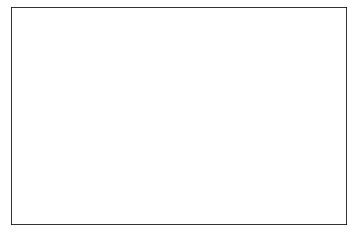

In [8]:
fig = plt.figure()
ax = plt.axes(xlim=(-L1-L2-0.5, L1+L2+0.5), ylim=(-2.5, 1.5))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
line1, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Earth
line2, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Jupiter
line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line5, = ax.plot([], [], 'o', color='k', markersize = 10)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)


ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

# initialization function: plot the background of each frame

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    time_string.set_text('')

    
    return  line3,line4, line5, line1, line2, time_string

def animate2(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = 6              # length of motion trail of weight 1 
    trail2 = 8              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    
    line1.set_data(x1b[i:max(1,i-trail1):-1], y1b[i:max(1,i-trail1):-1])   # marker + line of first weight
    line2.set_data(x2b[i:max(1,i-trail2):-1], y2b[i:max(1,i-trail2):-1])   # marker + line of the second weight
    line3.set_data([x1b[i], x2b[i]], [y1b[i], y2b[i]])       # line connecting weight 2 to weight 1
    line4.set_data([x1b[i], 0], [y1b[i],0])                # line connecting origin to weight 1 
    line5.set_data([0, 0], [0, 0])
    time_string.set_text(time_template % (i*dt))
    return  line3, line4,line5,line1, line2, time_string

anim2 = animation.FuncAnimation(fig, animate2, init_func=init,
                               frames=Nt, interval=1000*(t[2]-t[1])*0.8, blit=True)

In [9]:
anim2.save('double_pendulum_animation2.gif', fps=1.0/(t[2]-t[1]), writer = 'imagemagick')
IPdisplay.Image(url='double_pendulum_animation2.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


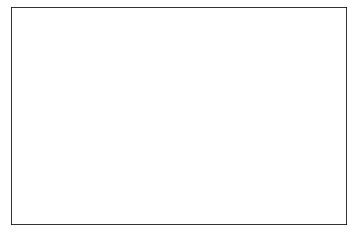

In [10]:
fig = plt.figure()
ax = plt.axes(xlim=(-L1-L2-0.5, L1+L2+0.5), ylim=(-2.5, 1.5))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
line1, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Earth
line2, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Jupiter
line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line5, = ax.plot([], [], 'o', color='k', markersize = 10)
line1b, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Earth
line2b, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Jupiter
line3b, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line4b, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line5b, = ax.plot([], [], 'o', color='k', markersize = 10)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)


ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

# initialization function: plot the background of each frame

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line1b.set_data([], [])
    line2b.set_data([], [])
    line3b.set_data([], [])
    line4b.set_data([], [])
    line5b.set_data([], [])
    time_string.set_text('')

    
    return  line3,line4, line5, line1, line2, time_string

def animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = 6              # length of motion trail of weight 1 
    trail2 = 8              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    
    line1.set_data(x1[i:max(1,i-trail1):-1], y1[i:max(1,i-trail1):-1])   # marker + line of first weight
    line2.set_data(x2[i:max(1,i-trail2):-1], y2[i:max(1,i-trail2):-1])   # marker + line of the second weight
    line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])       # line connecting weight 2 to weight 1
    line4.set_data([x1[i], 0], [y1[i],0])                # line connecting origin to weight 1 
    line5.set_data([0, 0], [0, 0])
    
    line1b.set_data(x1b[i:max(1,i-trail1):-1], y1b[i:max(1,i-trail1):-1])   # marker + line of first weight
    line2b.set_data(x2b[i:max(1,i-trail2):-1], y2b[i:max(1,i-trail2):-1])   # marker + line of the second weight
    line3b.set_data([x1b[i], x2b[i]], [y1b[i], y2b[i]])       # line connecting weight 2 to weight 1
    line4b.set_data([x1b[i], 0], [y1b[i],0])                # line connecting origin to weight 1 
    line5b.set_data([0, 0], [0, 0])   
    
    time_string.set_text(time_template % (i*dt))
    return  line3, line4, line5, line1, line2, line3b, line4b, line5b, line1b, line2b, time_string

anim3 = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=1000*(t[2]-t[1])*0.8, blit=True)

In [11]:
anim3.save('double_pendulum_animation3.gif', fps=1.0/(t[2]-t[1]), writer = 'imagemagick')
IPdisplay.Image(url='double_pendulum_animation3.gif')

MovieWriter imagemagick unavailable; using Pillow instead.
